In [0]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [0]:
# renomeando 
renamed = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold': 'vendido'
}

data = data.rename(columns = renamed)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [0]:
# "yes" e "no", poderiamos traduzir para "sim" ou "nao".
# mas o mais adequado seria usarmos "0" ou "1" quando temos duas classes (classificação binária)

swap = {
    'no' : 0,
    'yes' : 1
}

data.vendido = data.vendido.map(swap)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [0]:

# Ainda pode melhorar.
# Interessa aqui saber quão "velho" é o carro para venda
# Então pode-se colocar a "idade" do carro
from datetime import datetime

ano_atual = datetime.today().year
data['idade_do_modelo'] = ano_atual - data.ano_do_modelo
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [0]:
# mudando a coluna "milhas por ano" para "km por ano"
data['km_por_ano'] = data.milhas_por_ano * 1.60934
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


In [0]:
# tirando as colunas que não vou usar

#por padrão o drop() dropa linhas, pra tirar colunas usa-se o parametro "axis"
#data = data.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1) 
data.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['preco', 'idade_do_modelo', 'km_por_ano']]
y = data['vendido']

SEED = 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    stratify = y)
print('Treinando com %d elementos e testando com %d elementos' % (len(x_train), (len(x_test))))

model = LinearSVC()
model.fit(x_train, y_train)
predicts = model.predict(x_test)

accuracy = accuracy_score(y_test, predicts) * 100
print('A acurácia foi de %.2f%%' % accuracy)

Treinando com 7500 elementos e testando com 2500 elementos
A acurácia foi de 57.88%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# comparando com um baseline

from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(x_train, y_train)
predicts = dummy_most_frequent.predict(x_test)

accuracy = accuracy_score(y_test, predicts) * 100
print('A acurácia do dummy most frequent foi de %.2f%%' % accuracy)

A acurácia do dummy most frequent foi de 52.44%


In [0]:
# comparando com um baseline
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(x_train, y_train)
accuracy = dummy_most_frequent.score(x_test, y_test) * 100

print('A acurácia foi do dummy most frequent %.2f%%' % accuracy)

A acurácia foi do dummy most frequent 50.68%


In [0]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    stratify = y)
print('Treinando com %d elementos e testando com %d elementos' % (len(x_train), (len(x_test))))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
predicts = model.predict(x_test)

accuracy = accuracy_score(y_test, predicts) * 100
print('A acurácia foi de %.2f%%' % accuracy)

Treinando com 7500 elementos e testando com 2500 elementos


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


A acurácia foi de 77.48%


In [0]:
# classificador árvore de decisão (decision tree)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    stratify = y)
print('Treinando com %d elementos e testando com %d elementos' % (len(x_train), (len(x_test))))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)
predicts = model.predict(x_test)

accuracy = accuracy_score(y_test, predicts) * 100
print('A acurácia foi de %.2f%%' % accuracy)

Treinando com 7500 elementos e testando com 2500 elementos
A acurácia foi de 76.84%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


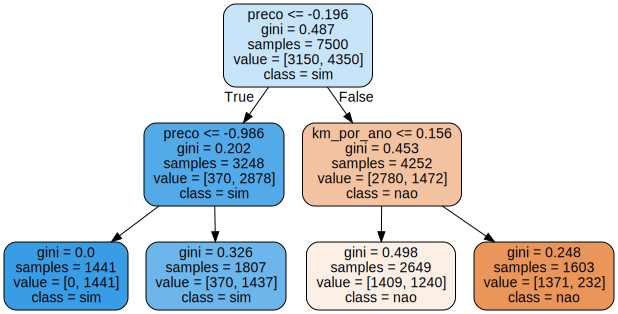

In [0]:
# exportando o visualizador gráfico para visualizar
from sklearn.tree import export_graphviz
# mas ele exporta apenas o formato do gráfico, então...
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features, 
                           filled = True, rounded = True,
                           class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico
# mas fica muito grande, eu quero visualizar melhor...
# posso passar como parâmetro "max_depth" no modelo... e passar alguns 
# parâmetros no gráfico para que me retorne features que eu entenda.


In [39]:
# porém há coisas erradas, como -0.196 ...
# Isso porque as árvores de decisão não exigem de Scalers pra funcionar bem
# classificador árvore de decisão (decision tree)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    stratify = y)
print('Treinando com %d elementos e testando com %d elementos' % (len(x_train), (len(x_test))))


model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_x_train, y_train)
predicts = model.predict(x_test)

accuracy = accuracy_score(y_test, predicts) * 100
print('A acurácia foi de %.2f%%' % accuracy)

Treinando com 7500 elementos e testando com 2500 elementos
A acurácia foi de 58.00%


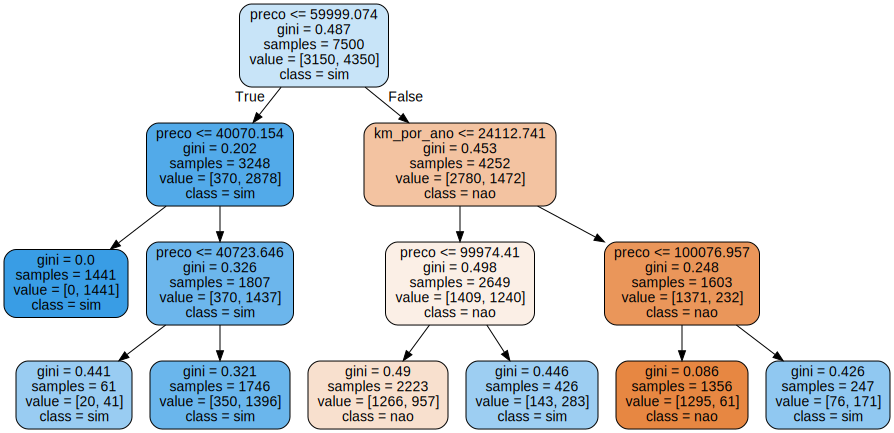

In [40]:
# agora está certo
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features, 
                           filled = True, rounded = True,
                           class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico